**Lets visualize using plot for better analyzing**

In [5]:
#Step 1: Importing necessary libraries
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt

In [6]:
#Step 2: Load the dataset into jupyter notebook
data = pd.read_csv('OnlineRetail.csv')

In [9]:
#Step 3: Viewing 5 rows of data
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
#Step 4: Creating and displaying the pivot table to find the total quantity of each product bought by each customer
total_product_quantity = data.pivot_table(
    index = 'CustomerID',
    columns = 'Description',
    values = 'Quantity',
    aggfunc = 'sum',
    fill_value = 0
)
display(total_product_quantity)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


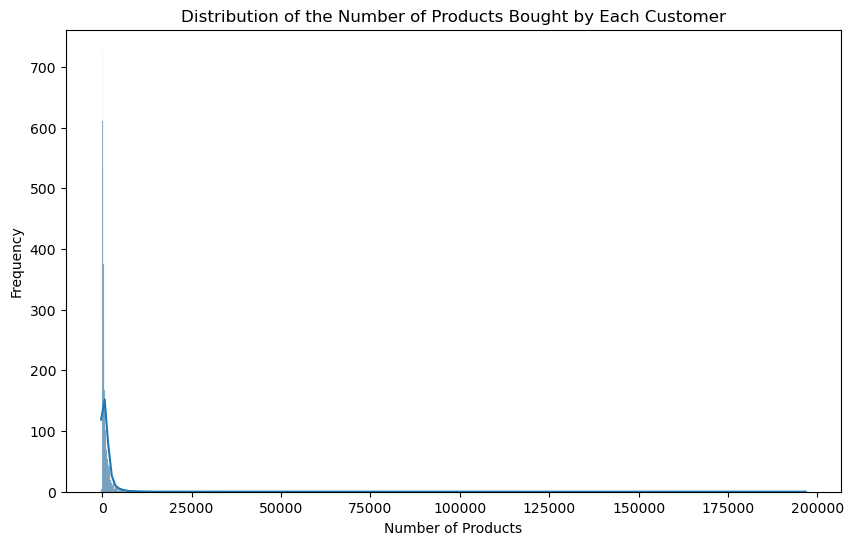

In [13]:
#Plot the distribution of the number of products bought by each customer using histogram

plt.figure(figsize=(10, 6))
sns.histplot(data=total_product_quantity.sum(axis=1), kde=True)
plt.title('Distribution of the Number of Products Bought by Each Customer')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.show()

In [15]:
#Step 5: Identifying Globally Popular Products
globally_popular_products = data['Description'].value_counts().head(10)
print("Globally Popular Products:")
print(globally_popular_products)

Globally Popular Products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64


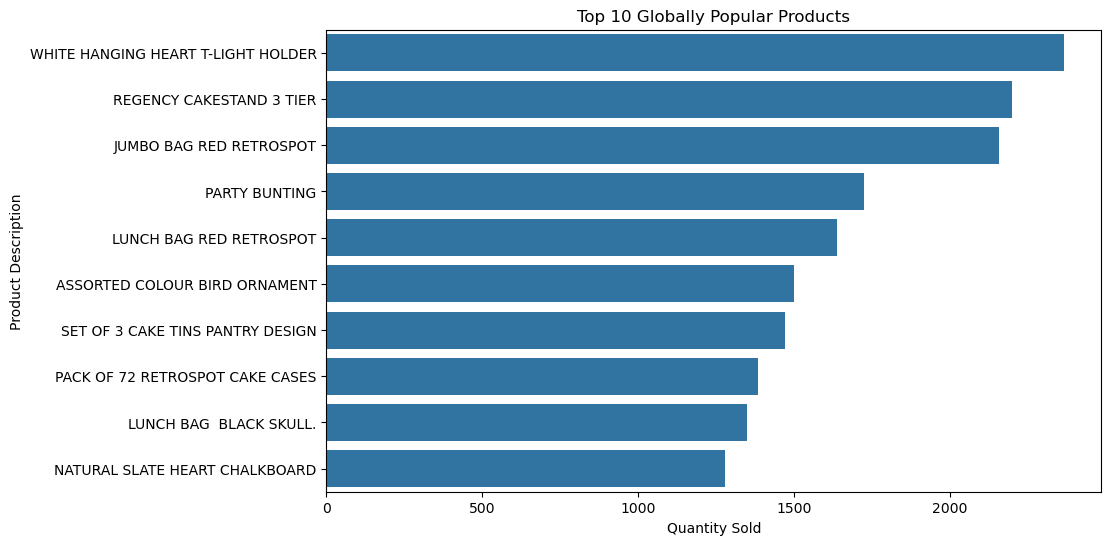

In [17]:
#Plotting globally popular products
plt.figure(figsize=(10, 6))
sns.barplot(x=globally_popular_products.values, y=globally_popular_products.index)
plt.title('Top 10 Globally Popular Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

In [19]:
#Step 6: Identify Country-wise Popular Products
country_popular_products = data.groupby('Country')['Description'].value_counts().groupby(level=0).nlargest(10).reset_index(level=0, drop=True).reset_index()
print("Country-wise Popular Products:")
print(country_popular_products.head(20)) 

Country-wise Popular Products:
      Country                         Description  count
0   Australia    SET OF 3 CAKE TINS PANTRY DESIGN     10
1   Australia             LUNCH BAG RED RETROSPOT      9
2   Australia       RED TOADSTOOL LED NIGHT LIGHT      9
3   Australia        BAKING SET 9 PIECE RETROSPOT      8
4   Australia          BAKING SET SPACEBOY DESIGN      8
5   Australia    HANGING HEART JAR T-LIGHT HOLDER      8
6   Australia           LUNCH BAG SPACEBOY DESIGN      8
7   Australia             PAPER BUNTING RETROSPOT      8
8   Australia                       PARTY BUNTING      8
9   Australia     ROSES REGENCY TEACUP AND SAUCER      8
10    Austria                             POSTAGE     14
11    Austria     RETROSPOT TEA SET CERAMIC 11 PC      4
12    Austria   ROUND SNACK BOXES SET OF 4 FRUITS      4
13    Austria  ROUND SNACK BOXES SET OF4 WOODLAND      4
14    Austria           BREAD BIN DINER STYLE RED      3
15    Austria            DOLLY GIRL BABY GIFT SET      3


In [23]:
#Plot country-wise popular products for a specific country
country = input('Enter country name: ').capitalize()  # enter country from dataset
if country not in data['Country'].unique():
    print( f"Country name '{country}' not found in the data. check the country name.")
else:
    popular_products = country_popular_products[country_popular_products['Country'] == country]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=popular_products['Description'].value_counts().values, 
                y=popular_products['Description'].value_counts().index )
    plt.title(f'Top 10 Popular Products in {country}')
    plt.xlabel('Quantity Sold')
    plt.ylabel('Product Description')
    plt.show()

Enter country name:  mumbai


Country name 'Mumbai' not found in the data. check the country name.


Enter country name:  austria


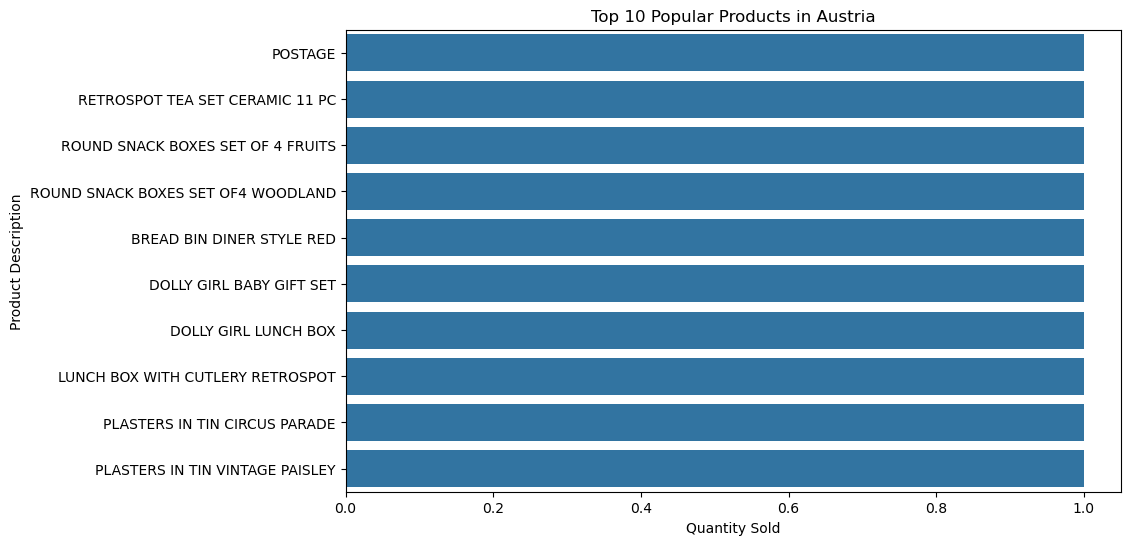

In [25]:
#Plot country-wise popular products for a specific country
country = input('Enter country name: ').capitalize()  # enter country from dataset
if country not in data['Country'].unique():
    print( f"Country name '{country}' not found in the data. check the country name.")
else:
    popular_products = country_popular_products[country_popular_products['Country'] == country]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=popular_products['Description'].value_counts().values, 
                y=popular_products['Description'].value_counts().index )
    plt.title(f'Top 10 Popular Products in {country}')
    plt.xlabel('Quantity Sold')
    plt.ylabel('Product Description')
    plt.show()

In [27]:
#Step 7: Identifying Month-wise Popular Products

#Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [29]:
#Extract month and year from InvoiceDate
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')

In [31]:
month_popular_products = data.groupby('MonthYear')['Description'].value_counts().groupby(level=0).nlargest(10).reset_index(level=0, drop=True).reset_index()
print("Month-wise Popular Products:")
print(month_popular_products.head(20))

Month-wise Popular Products:
   MonthYear                         Description  count
0    2010-12  WHITE HANGING HEART T-LIGHT HOLDER    241
1    2010-12            REGENCY CAKESTAND 3 TIER    191
2    2010-12      PAPER CHAIN KIT 50'S CHRISTMAS    175
3    2010-12         HAND WARMER BABUSHKA DESIGN    170
4    2010-12        SCOTTIE DOG HOT WATER BOTTLE    162
5    2010-12          CHOCOLATE HOT WATER BOTTLE    155
6    2010-12               HEART OF WICKER SMALL    144
7    2010-12           HOT WATER BOTTLE BABUSHKA    142
8    2010-12              JAM MAKING SET PRINTED    141
9    2010-12   PAPER CHAIN KIT VINTAGE CHRISTMAS    139
10   2011-01  WHITE HANGING HEART T-LIGHT HOLDER    185
11   2011-01            REGENCY CAKESTAND 3 TIER    156
12   2011-01    SET OF 3 CAKE TINS PANTRY DESIGN    156
13   2011-01               HEART OF WICKER SMALL    145
14   2011-01      NATURAL SLATE HEART CHALKBOARD    126
15   2011-01             JUMBO BAG RED RETROSPOT    122
16   2011-01       

In [37]:
#Plot month-wise popular products for a specific month
specific_month = input('Enter year and month (yyyy-mm): ')
if specific_month not in data['MonthYear'].unique():
            print( f"Year and month '{specific_month}' not found in the data. check the year and month.")
else:
    monthly_popular_products = month_popular_products[month_popular_products['MonthYear'] == specific_month]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=monthly_popular_products['Description'].value_counts().values, 
                y=monthly_popular_products['Description'].value_counts().index)
    plt.title(f'Top 10 Popular Products in {specific_month}')
    plt.xlabel('Quantity Sold')
    plt.ylabel('Product Description')
    plt.show()

Enter year and month (yyyy-mm):  2024-12


Year and month '2024-12' not found in the data. check the year and month.


Enter year and month (yyyy-mm):  2010-12


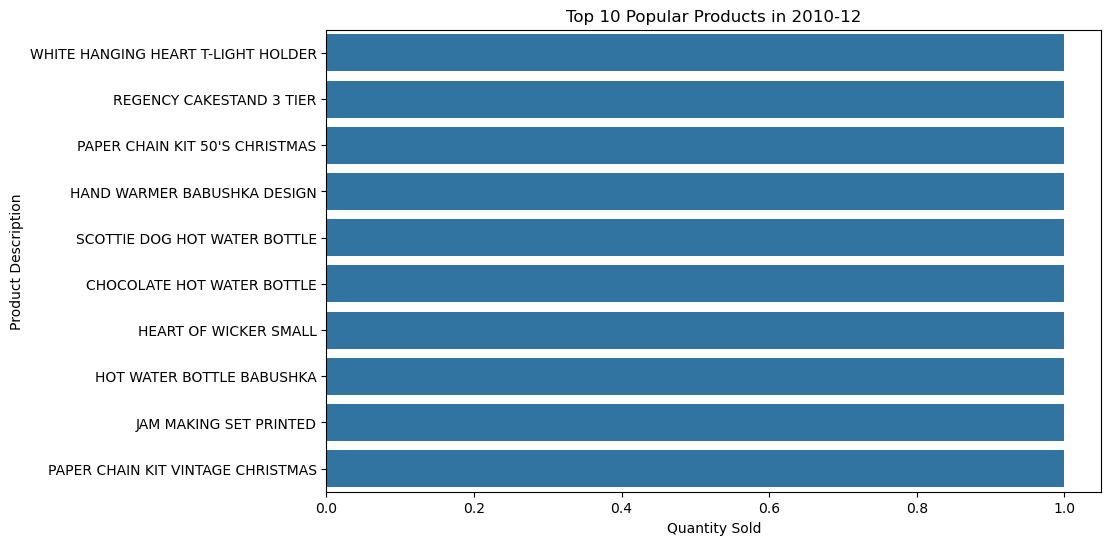

In [39]:
#Plot month-wise popular products for a specific month
specific_month = input('Enter year and month (yyyy-mm): ')
if specific_month not in data['MonthYear'].unique():
            print( f"Year and month not'{specific_month}' found in the data. check the year and month.")
else:
    monthly_popular_products = month_popular_products[month_popular_products['MonthYear'] == specific_month]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=monthly_popular_products['Description'].value_counts().values, 
                y=monthly_popular_products['Description'].value_counts().index)
    plt.title(f'Top 10 Popular Products in {specific_month}')
    plt.xlabel('Quantity Sold')
    plt.ylabel('Product Description')
    plt.show()